In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv("Data/mouse_drug_data.csv")
mouse_df.head()

clinic_df = pd.read_csv("Data/clinicaltrial_data.csv")
clinic_df.head()

# Combine the data into a single dataset
combined_df = pd.merge(mouse_df, clinic_df, how='outer', on='Mouse ID')

# Display the data table for preview

combined_df.head(10)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_tumor = combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].agg('mean')

# Convert to DataFrame

mean_tumor_df = pd.DataFrame(data = mean_tumor)

# Preview DataFrame
mean_tumor_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_err_tumor = combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].agg(np.std, ddof=0)
# Convert to DataFrame
std_err_tumor_df = pd.DataFrame(data = std_err_tumor)
# Preview DataFrame
std_err_tumor_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    2.197647
          10                   3.442436
          15                   4.021867
          20                   4.267015
          25                   4.040192
          30                   4.282231
          35                   4.821974
          40                   5.472143
          45                   5.473794
Ceftamin  0                    0.000000
          5                    0.735688
          10                   1.029330
          15                   1.408781
          20                   1.482184
          25                   1.811512
          30                   1.900164
          35                   2.495934
          40                   2.554552
          45                   3.125859
Infubinol 0                    0.000000
          5                    1.151761
          10                   1.262689
          15                   1.599705
          20                   2.075749
          25                   2.269005
          30                   2.524244
          35                   3.264073
          40                   3.165659
          45                   3.236929
...                                 ...
Ramicane  0                    0.000000
          5                    2.365989
          10                   3.454076
          15                   3.694863
          20                   3.687602
          25                   3.503701
          30                   4.056767
          35                   4.326493
          40                   4.918779
          45                   5.347519
Stelasyn  0                    0.000000
          5                    1.175081
          10                   2.034132
          15                   2.313599
          20                   2.781171
          25                   3.147711
          30                   3.708932
          35                   3.885324
          40                   4.677884
          45                   4.985508
Zoniferol 0                    0.000000
          5                    0.906174
          10                   1.209568
          15                   1.657125
          20                   2.132729
          25                   2.333522
          30                   2.993486
          35                   3.178026
          40                   3.600198
          45                   3.618444

[100 rows x 1 columns]

In [15]:
# Minor Data Munging to Re-Format the Data Frames
pivot_std_err_tumor_df = pd.pivot_table(std_err_tumor_df, values='Tumor Volume (mm3)', 
                     index=['Timepoint'], 
                     columns='Drug')

# Preview that Reformatting worked
pivot_std_err_tumor_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2.197647,0.735688,1.151761,1.242109,0.949271,1.045927,1.135133,2.365989,1.175081,0.906174
10,3.442436,1.029330,1.262689,1.637910,1.428468,1.928230,1.764510,3.454076,2.034132,1.209568
15,4.021867,1.408781,1.599705,2.461868,1.987318,2.678375,1.864437,3.694863,2.313599,1.657125
20,4.267015,1.482184,2.075749,3.082210,2.594679,3.562160,2.220724,3.687602,2.781171,2.132729
25,4.040192,1.811512,2.269005,3.204945,3.354998,4.139488,2.081850,3.503701,3.147711,2.333522
30,4.282231,1.900164,2.524244,3.851479,3.649973,4.558204,2.584374,4.056767,3.708932,2.993486
35,4.821974,2.495934,3.264073,4.511469,3.793175,4.642077,3.254788,4.326493,3.885324,3.178026
40,5.472143,2.554552,3.165659,4.334519,4.185296,4.545879,4.425864,4.918779,4.677884,3.600198


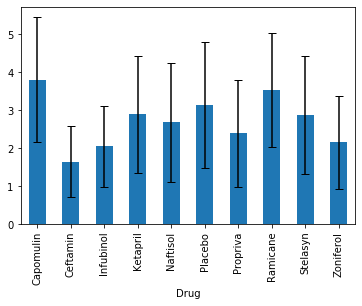

In [29]:
# Generate the Plot (with Error Bars)

means = pivot_std_err_tumor_df.mean()
errors = pivot_std_err_tumor_df.std()

fig, ax = plt.subplots()

means.plot.bar(yerr=errors, ax=ax, capsize=4)
plt.show()

In [38]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metsite = combined_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].agg(np.mean)
# Convert to DataFrame
mean_metsite_df = pd.DataFrame(data = std_err_tumor)

# Preview DataFrame
mean_metsite_df.head(15)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111

In [39]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mean_metsite_df = pd.pivot_table(mean_metsite_df, values='Metastatic Sites', 
                     index=['Timepoint'], 
                     columns='Drug')

# Preview that Reformatting worked
pivot_mean_metsite_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


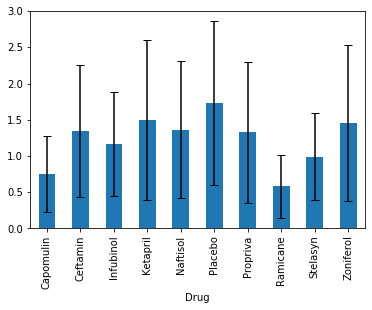

In [40]:
# Generate the Plot (with Error Bars)

means = pivot_mean_metsite_df.mean()
errors = pivot_mean_metsite_df.std()

fig, ax = plt.subplots()

means.plot.bar(yerr=errors, ax=ax, capsize=4)
plt.show()

In [47]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mouse = combined_df.groupby(['Drug','Timepoint']).agg({"Mouse ID": [ 'count']})
# Convert to DataFrame
count_mouse_df = pd.DataFrame(data = count_mouse)

# Preview DataFrame
count_mouse_df.head(15)

Mouse ID
                       count
Drug      Timepoint         
Capomulin 0               25
          5               25
          10              25
          15              24
          20              23
          25              22
          30              22
          35              22
          40              21
          45              21
Ceftamin  0               25
          5               21
          10              20
          15              19
          20              18

In [48]:
# Minor Data Munging to Re-Format the Data Frames
pivot_count_mouse_df = pd.pivot_table(count_mouse_df, values='Mouse ID', 
                     index=['Timepoint'], 
                     columns='Drug')

# Preview that Reformatting worked
pivot_count_mouse_df

count                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

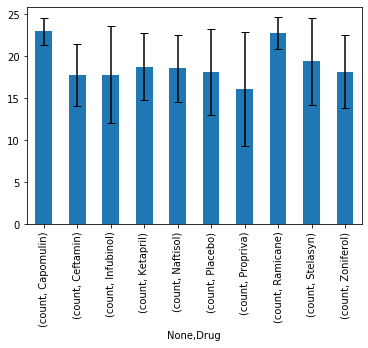

In [49]:
# Generate the Plot (with Error Bars)

means = pivot_count_mouse_df.mean()
errors = pivot_count_mouse_df.std()

fig, ax = plt.subplots()

means.plot.bar(yerr=errors, ax=ax, capsize=4)
plt.show()